In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
original_df = pd.read_excel("data.xlsx") 

In [4]:
df = original_df

In [5]:
df_shape = df.shape
print("The original dataset has " + str(df_shape[0]) + " rows and " + str(df_shape[1]) + " columns")

The original dataset has 730178 rows and 59 columns


# Processing "true_genre" columns

In [6]:
# encodes genres jaxx, electronic, folk/country, funk/soul/rnb, pop, rap/hip-hop, classical/baroque, rock
# this schema does not consider genres with multiple labels (e.g. "pop, rock") and only intakes the first genre label identified. 
lis = []
for d in df['true_genre']:
    if type(d) == str:
        d = d.lower()
        g = ''
        if 'jazz' in d:
            lis.append(1)
            continue
        if 'electronic' in d:
            lis.append(2)
            continue
        if ('folk' in d) or('country' in d):
            lis.append(3)
            continue
        if ('funk' in d) or ('soul' in d) or ('rnb' in d) or ('r&b' in d):
            lis.append(4)
            continue
        if 'pop' in d:
            lis.append(5)
            continue
        if ('rap' in d) or (('hip' in d) and ('hop' in d)):
            lis.append(6)
            continue
        if ('classical' in d) or ('baroque' in d):
            lis.append(7)
            continue
        if 'rock' in d:
            lis.append(8)
            continue
        if g == '':
            lis.append(None)
            continue
    else:
        lis.append(None)
        
print("lis length:", len(lis))
print("df length:", len(df))

lis length: 730178
df length: 730178


# Processing AcousticBrainz'z  (AB's) "genre" column which is a genre prediction. 
This will be used to see AcousticBrainz's accuracy

In [7]:
lis_gen = []
for d in df['genre']:
    if type(d) == str:
        d = d.lower()
        g = ''
        if 'jazz' in d:
            lis_gen.append(1)
            continue
        if 'electronic' in d:
            lis_gen.append(2)
            continue
        if ('folk' in d) or('country' in d):
            lis_gen.append(3)
            continue
        if ('funk' in d) or ('soul' in d) or ('rnb' in d) or ('r&b' in d):
            lis_gen.append(4)
            continue
        if 'pop' in d:
            lis_gen.append(5)
            continue
        if ('rap' in d) or (('hip' in d) and ('hop' in d)):
            lis_gen.append(6)
            continue
        if ('classical' in d) or ('baroque' in d):
            lis_gen.append(7)
            continue
        if 'rock' in d:
            lis_gen.append(8)
            continue
        if g == '':
            lis_gen.append(None)
            continue
    else:
        lis_gen.append(None)
        
print("lis length:", len(lis_gen))
print("df length:", len(df))

lis length: 730178
df length: 730178


In [9]:
#assigns processed genre lists to df

df['genre_parse'] = lis
df['genre_predict'] = lis_gen


In [10]:
# creating a df for comparing AB's predicted versus true genre
df_gen = df.copy(deep=True)
df_gen = df_gen.dropna(subset=['genre_predict'])

In [11]:
# drops columns outside not included in the 8 above. 
df.dropna(subset=['genre_parse'], inplace=True)

In [12]:
# drops columns outside not included in the 8 above. 
df_gen.dropna(subset=['genre_parse'], inplace=True)

In [13]:
# checking equality in true genre versus AB's predicted genre
df_gen['genres_match'] = df_gen.apply(lambda row: row['genre_parse'] == row['genre_predict'], axis=1)

In [14]:
print("AcousticBrainz Accuracy Estimation", sum(df_gen["genres_match"])/df_gen.shape[0])

AcousticBrainz Accuracy Estimation 0.1634646400054326


## Processing year column

In [15]:
# this shows all possible year labels 
df["year"].unique()

array([2013, 1984, 2003, 1997, 2005, 1996, 2007, 2001, 1968, 1961, 1965,
       2002, 1999, 1977, 1991, 2006, 2009, 2008, 1998, 2000, 1960, 1980,
       2011, 1983, 1993, 1992, 1995, 1994, 2004, 1989, 1979, 2012, 1939,
       1966, 2010, 1964, 1986, 1956, 1982, 1955, 1972, 1963, 1957, 2014,
       1958, 1981, 1990, 1962, 1971, 1985, 1978, 1975, 1976, 1988, 1974,
       1953, 1973, 1959, 1951, 2015, 1969, 1987, 1967, 1952, 1970, 1949,
       1944, 1954, 1937, 1938, 1950, 1940, 1933, 0, 1946, 1934, 70,
       "['2008/2008', '2008']", "['199?']", 1201, 1948, 1945, 1935, 1941,
       3009, "['    ']", "['196x']", 1924, 1947, 1930, 1927, 1929,
       "['1979/1982/1989']", 711,
       "['recorded june24 1999, bim huis, amsterdam']", 1936, 1932,
       "['2010/2010', '2010']", 1, "['']", 1928, 90, 1943, 1931,
       "['1975 03']", '["\'59/\'61", \'1963\']', 704, 80, 310,
       "['1.3.2012']", 7, "['198x']", 199, 1202, "['xxxx']", "['199x']",
       1919, 1925, 1942, 101, 1923, 1913, "['195x'

In [16]:
# converts all possible strings to ints and replaces nonconvertable strings with None for dropping
def extract_year(value):
    try:
        return int(value)
    except ValueError:

        return None


df['year'] = df['year'].apply(extract_year)

In [17]:
# inlcuding only valid years 
valid_years = [1998, 2013, 1984, 2003, 1997, 2005, 2014, 2007, 2006, 1996, 1979, 2004, 2001, 2002, 1992, 1968, 1995, 1993, 1989, 2008, 2009, 1961, 1965, 1988, 1999, 2000, 1977, 2010, 1982, 1991, 1985, 1964, 1970, 2011, 1960, 1994, 1980, 1983, 1957, 1958, 1963, 1987, 2012, 1939, 1966, 1990, 1986, 1969, 1956, 1955, 1972, 1962, 1981, 1971, 2015, 1967, 1978, 1975, 1976, 1974, 1953, 1973, 1959, 1951, 1952, 1949, 1944, 1954, 1937, 1938, 1950, 1940, 1933, 1946, 1934, 1201, 1948, 1945, 1935, 1941, 1010, 1924, 1947, 1930, 1927, 1942, 1929, 1936, 1932, 1928, 1943, 1931, 1803, 1202, 1919, 1925, 1923, 1913, 1910, 1920, 1876, 1890, 1905, 1899, 1856, 1916, 1926, 1917, 1922, 1918]

filtered_df = df[df['year'].isin(valid_years)] 
df_shape = filtered_df.shape
print("The dataset with valid years has " + str(df_shape[0]) + " rows and " + str(df_shape[1]) + " columns")

The dataset with valid years has 380077 rows and 61 columns


In [18]:
filtered_df = filtered_df.dropna(subset=['year'])

In [19]:
# checking year dtype for confirmation of processing
print(filtered_df.dtypes["year"])

float64


In [20]:
# filtering for only modern music 
filtered_df = filtered_df[filtered_df['year'] >= 1920]

In [22]:
print("post-genre and year processing df size")
print(filtered_df.shape)

post-genre and year processing df size
(380012, 61)


In [50]:
filtered_df.columns

Index(['id', 'danceability', 'gender_male', 'alternative', 'blues',
       'electronic', 'folkcountry', 'funksoulrnb', 'jazz', 'pop', 'raphiphop',
       'rock', 'genre', 'acoustic', 'aggressive', 'mood_electronic', 'happy',
       'party', 'relaxed', 'sad', 'mood_mirex_1', 'mood_mirex_2',
       'mood_mirex_3', 'mood_mirex_4', 'mood_mirex_5', 'timbre_bright',
       'tonal', 'instrumental', 'bit_rate', 'codec', 'length', 'lossless',
       'replay_gain', 'true_genre', 'artist', 'album', 'bpm', 'year', 'date',
       'label', 'song', 'artistsort', 'submission_offset', 'bpm_2',
       'bpm_histogram_first_peak_bpm_mean',
       'bpm_histogram_first_peak_bpm_median',
       'bpm_histogram_second_peak_bpm_mean',
       'bpm_histogram_second_peak_bpm_median', 'danceability_2', 'onset_rate',
       'submission_offset_2', 'key_key', 'key_scale', 'tuning_frequency',
       'tuning_equal_tempered_deviation', 'submission_offset_2.1',
       'average_loudness', 'dynamic_complexity', 'mfcc_zero_m

## EDA

### Year distribution

Text(0, 0.5, 'song_count')

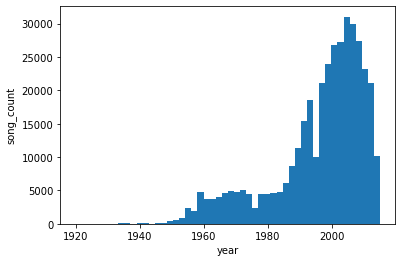

In [28]:
plt.hist(filtered_df["year"], bins=50)
plt.xlabel("year")
plt.ylabel("song_count")

### Year distribution by genre

<Figure size 1080x720 with 0 Axes>

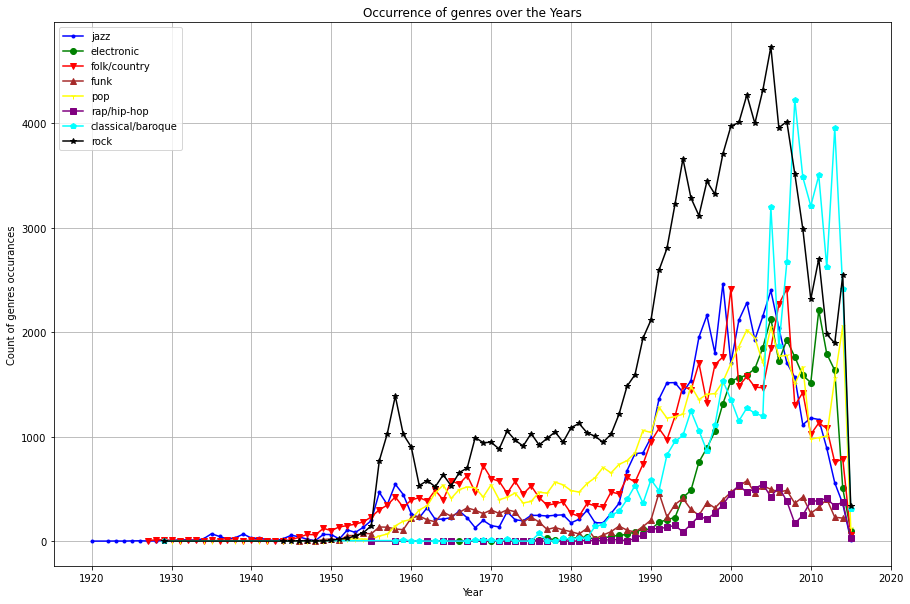

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(15,10))

markers = [".", "o", "v", "^", "1", "s", "p", "*"]
c = ["blue", "green", "red", "brown", "yellow", "purple", "cyan", "black"]
genre = ["jazz", "electronic", "folk/country", "funk", "pop", "rap/hip-hop", "classical/baroque", "rock"]

plt.figure(figsize=(15,10))
for i in range(8):

    yearly_counts = filtered_df[filtered_df['genre_parse'] == i+1].groupby('year').size()
    yearly_counts_df = yearly_counts.reset_index(name='count')
    plt.plot(yearly_counts_df['year'].values, yearly_counts_df['count'].values, marker=markers[i], color=c[i], label=genre[i])


plt.xlabel('Year')
plt.ylabel('Count of genres occurances')
plt.title('Occurrence of genres over the Years')
plt.grid(True)
plt.xticks(range(1920, 2025, 10))
plt.legend()

plt.show()
plt.savefig('Occurrence of genres over the Years')

This graph shows that the 8 genred we picked follow the same relative distribution as all years. This means that these genres are good choices since they each follow the whole distribution.

### Genre bar graphs to check class-genre evenness 

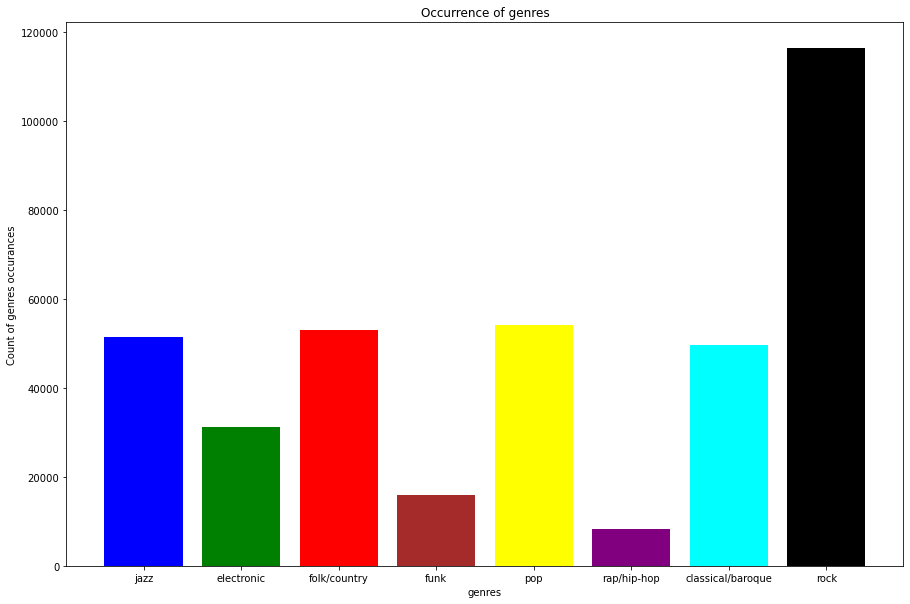

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(15,10))
for i in range(8):

    counts = len(filtered_df[filtered_df['genre_parse'] == i+ 1])
    plt.bar(genre[i], height=counts, color=c[i])


plt.xlabel('genres')
plt.ylabel('Count of genres occurances')
plt.title('Occurrence of genres')



plt.show()
plt.savefig('Occurrence of genres over the Years')

Rock is over represented while rap/hip-hop and funk were underrepresented.

## Additional Preprocessing (Encoding and Keeping Numerical Features)

In [32]:
def find_non_numeric_columns(df):

    non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64', 'int32', 'float32', 'int'])

    # non_numeric_columns now contains only the columns with data types other than int or float
    # list of names w non-numeric columns
    non_numeric_column_names = non_numeric_columns.columns.tolist()
    
    return non_numeric_column_names

In [34]:
# encodes key signature, including scale type (major/minor) and keu (A, A#, B, etc)
def encode_key_vectorized(df):
    # create a mapping from unique values to their indices
    key_scale_mapping = {key: idx for idx, key in enumerate(df['key_scale'].unique())}
    key_key_mapping = {key: idx for idx, key in enumerate(df['key_key'].unique())}
    
    # map the original column values to the indices
    df['key_scale'] = df['key_scale'].map(key_scale_mapping)
    df['key_key'] = df['key_key'].map(key_key_mapping)
    
    return df

In [35]:
# enocdes the keys to numeric
encode_key_vectorized(filtered_df)
filtered_df.head(3)["key_scale"]

1    0
2    1
3    0
Name: key_scale, dtype: int64

In [36]:
# list of non_numeric columns for doing encoding
find_non_numeric_columns(filtered_df)

['id',
 'genre',
 'codec',
 'true_genre',
 'artist',
 'album',
 'bpm',
 'date',
 'label',
 'song',
 'artistsort']

In [37]:
# checks if string
def is_string(x):
    return isinstance(x, str)


In [38]:
# filtering out non_numeric columns
numeric_df = filtered_df.drop(columns=find_non_numeric_columns(filtered_df))

In [39]:
numeric_df.columns

Index(['danceability', 'gender_male', 'alternative', 'blues', 'electronic',
       'folkcountry', 'funksoulrnb', 'jazz', 'pop', 'raphiphop', 'rock',
       'acoustic', 'aggressive', 'mood_electronic', 'happy', 'party',
       'relaxed', 'sad', 'mood_mirex_1', 'mood_mirex_2', 'mood_mirex_3',
       'mood_mirex_4', 'mood_mirex_5', 'timbre_bright', 'tonal',
       'instrumental', 'bit_rate', 'length', 'lossless', 'replay_gain', 'year',
       'submission_offset', 'bpm_2', 'bpm_histogram_first_peak_bpm_mean',
       'bpm_histogram_first_peak_bpm_median',
       'bpm_histogram_second_peak_bpm_mean',
       'bpm_histogram_second_peak_bpm_median', 'danceability_2', 'onset_rate',
       'submission_offset_2', 'key_key', 'key_scale', 'tuning_frequency',
       'tuning_equal_tempered_deviation', 'submission_offset_2.1',
       'average_loudness', 'dynamic_complexity', 'mfcc_zero_mean',
       'genre_parse', 'genre_predict'],
      dtype='object')

In [40]:
### Correlation heatmap for EDA

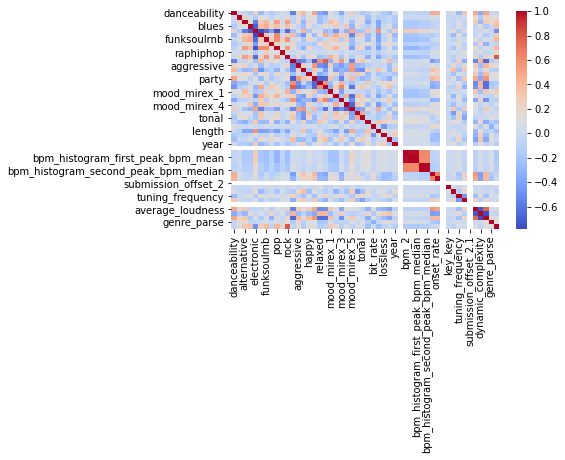

<Figure size 1080x1080 with 0 Axes>

In [41]:
# creating a correlation heatmap to find redundent features.
corr = numeric_df.corr()


sns.heatmap(corr, annot=False, cmap='coolwarm')

plt.figure(figsize=(15,15))
plt.show()

In [42]:
# checking for any nans in the colums after filtering 

def count_nan_in_columns(df):
    return df.isna().sum()


In [44]:
# checking for nans, only present in genre_true
nan_counts = count_nan_in_columns(numeric_df)
print(nan_counts)


danceability                                0
gender_male                                 0
alternative                                 0
blues                                       0
electronic                                  0
folkcountry                                 0
funksoulrnb                                 0
jazz                                        0
pop                                         0
raphiphop                                   0
rock                                        0
acoustic                                    0
aggressive                                  0
mood_electronic                             0
happy                                       0
party                                       0
relaxed                                     0
sad                                         0
mood_mirex_1                                0
mood_mirex_2                                0
mood_mirex_3                                0
mood_mirex_4                      

Text(0.5, 1.0, 'tuning frequency histogram')

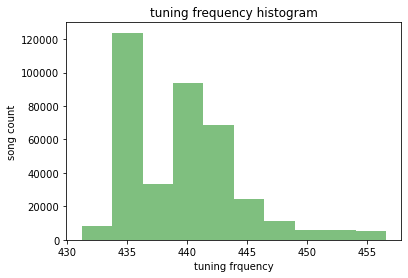

In [45]:
# checking tuning frequency value range and spread to see if suitable for encoding
plt.hist(numeric_df["tuning_frequency"], alpha=.5, color="green")
plt.xlabel("tuning frquency")
plt.ylabel("song count")
plt.title("tuning frequency histogram")

Text(0.5, 1.0, 'bpm histogram')

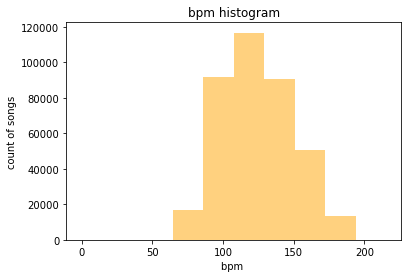

In [46]:
# checking bpm (bpm_2) value range and spread to see if suitable for encoding
plt.hist(numeric_df["bpm_2"], alpha=.5, color="orange")
plt.xlabel("bpm ")
plt.ylabel("count of songs")
plt.title("bpm histogram")

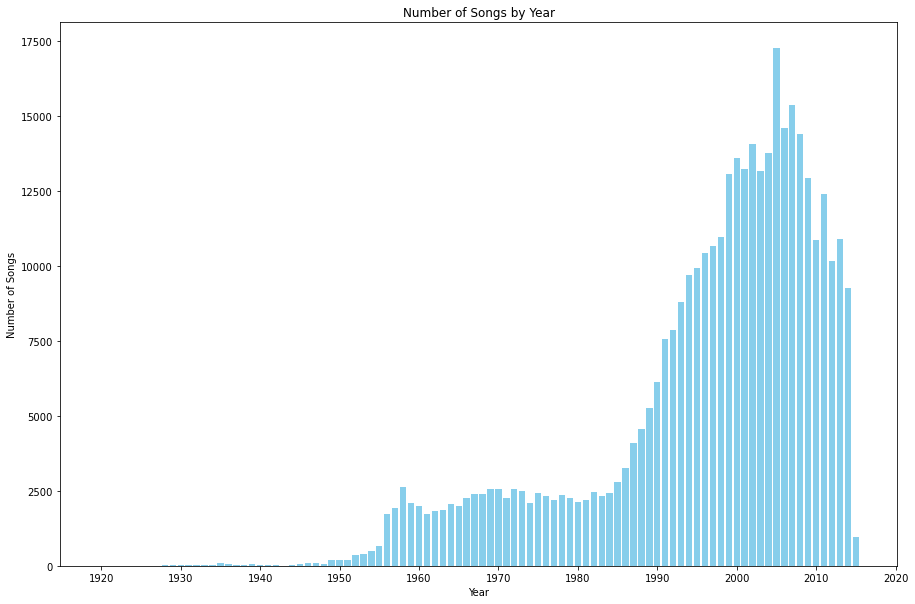

In [47]:
numeric_df['year'] = numeric_df['year'].astype(float)  # Convert to float first to handle strings like '2009.0'
numeric_df['year'] = numeric_df['year'].astype('Int64')
year_counts = numeric_df['year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(15, 10))  # Adjust the figure size if needed
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Year')
plt.xticks(range(1920, 2025, 10))  # Rotate x-axis labels for better readability

plt.show()


In [51]:
processed_nonnumeric_metadata_info_df = filtered_df.loc[numeric_df.index, ['id', 'artist', 'album', 'song', 'label']]

In [52]:
processed_nonnumeric_metadata_info_df.to_csv("processed_nonnumeric_metadata.csv", index=False)

In [53]:
numeric_df.to_csv("processed_genre_numeric_data.csv", index=False)